# Clustering lab
Denis Fouchard

This lab is about implementing the K-Means algorithm by hand to better understand how it works.
It is a very simple lab, as it is one of the first of the year

In [510]:
import pandas as pd
import numpy as np
import sklearn.cluster as clustering
import matplotlib.pyplot as plt

In [511]:
df = pd.read_csv("data.csv")
df.shape

(30, 26)

In [512]:
def format(df:pd.DataFrame):
    ## Format data frame to numpy objects for computations
    df = df.drop(columns=["StockName"])
    data = df.to_numpy()
    return data


We choose this data structure for the graph and the clusters : 
- Each data point is a vertex denoted by a numpy array of coordinates.
- The clusters are represented by arrays of points belonging to the cluster for computation speed purposes.
- We keep a dictionnary with each vertex and its associated cluster (that we update when necessary).

We start by defining the function SSE.

In [513]:
def sse(data, centroid, cluster):
    SSE = 0
    for i in range(len(data)):
        c = cluster[i]
        SSE += np.linalg.norm(data[i]- centroid[c])**2
    return SSE

In [514]:
def compute_centroids(clusters_list:list):
    new_centroids = [0]*len(clusters_list)
    for i in range(len(clusters_list)):
        new_centroids[i] = np.mean(clusters_list[i], axis=0)
    return new_centroids

In [515]:
from copy import deepcopy
def kmeans(data, k):
    ## Initialize centroids
    centroids_idx = np.random.choice(len(data), k, replace=False)
    centroids = data[centroids_idx]

    ## Initialize clusters
    clusters = [[] for i in range(k)]
    cluster = np.array([0]*len(data))

    ## Initialize SSE
    SSE = sse(data, centroids, cluster)

    # For each data point, find the closest centroid and assign to cluster
    for i in range(len(data)):
        distances = np.linalg.norm(data[i] - centroids, axis=1)
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(data[i])
        cluster[i] = cluster_idx
    
    # Compute new centroids
    new_centroids = compute_centroids(clusters)

    # Compute new SSE
    new_SSE = sse(data, new_centroids, cluster)

    while abs(new_SSE - SSE) > 1e-5:
        SSE = deepcopy(new_SSE)
        centroids = new_centroids
        clusters = [[] for i in range(k)]
        for i in range(len(data)):
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(data[i])
            cluster[i] = cluster_idx
        new_centroids = compute_centroids(clusters)
        new_SSE = sse(data, new_centroids, cluster)
    
    return centroids, cluster, SSE

    
    
  

### With sklearn

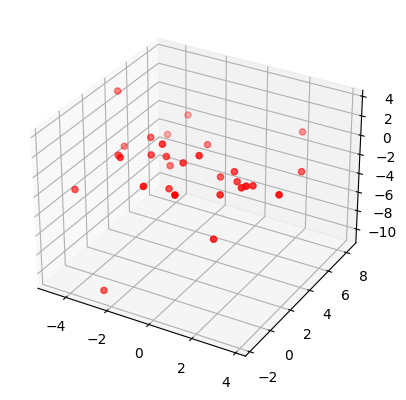

In [516]:
data = format(df)

# Display the first 3 dimensions of the data in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', marker='o')
plt.show()


In [517]:
sk_centroids, sk_clusters, sk_SSE = clustering.k_means(data, 8)
print("SSE: ", sk_SSE)

SSE:  1576.3205628535065


/Users/df/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


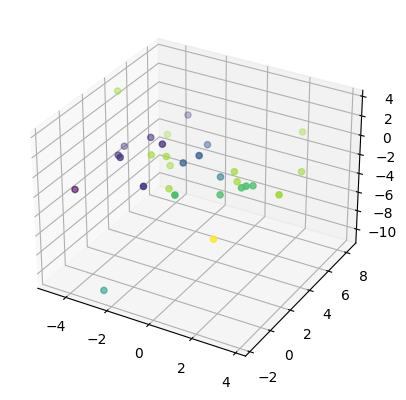

In [518]:


# Display the first 3 dimensions of the data in a 3D plot with the clusters colored
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=sk_clusters, marker='o')
plt.show()



## With our implementation

In [519]:
centroids, clusters, SSE = kmeans(data, 8)
print("SSE: ", SSE)



SSE:  1943.1552888881822


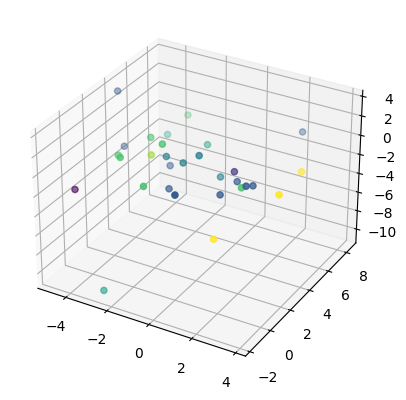

In [520]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=clusters, marker='o')
plt.show()

In [528]:
# Proportion of agreement between the two clustering methods

print(np.linalg.norm(sk_centroids - centroids)/np.linalg.norm(sk_centroids))

0.7007281382919212
